In [2]:
train = pd.read_csv('F:/学习/大三上/信息安全学基础/dataset/train.csv')
test = pd.read_csv('F:/学习/大三上/信息安全学基础/datasettest_dataset.csv')

OSError: Initializing from file failed

In [1]:
import pandas as pd
import numpy as np
import re

In [122]:
train = train.fillna({'content':'','picture_lists':'','category':'','ncw_label':0,'fake_label':0,'real_label':0,'comment_2c':'','comment_all':''})
test = test.fillna({'content':'','picture_lists':'','category':'','comment_2':'','comment_all':''})

In [3]:
# 去掉content的html
for i in range(train.shape[0]):
    train.loc[i,'content'] = re.sub(r'http[0-9a-zA-Z:/-_.&@#$%^*=+]+', 'url', train.loc[i,'content'])

# content_len
train['content_len'] = None
for i in range(train.shape[0]):
    train.loc[i,'content_len'] = len(train.loc[i,'content'])
    
# 删除长度<=11的
train = train[~train['content_len'].isin([i for i in range(12)])]
train.index = range(len(train))

# 全部评论的数量
train['comment_num'] = None
for i in range(train.shape[0]):
    try:
        train.loc[i,'comment_num'] = len(train.loc[i,'comment_all'].strip('\t').split('\t').remove(''))
    except:
        train.loc[i,'comment_num'] = 0
        
# 评论的数量2
train['comment_num2'] = None
for i in range(train.shape[0]):
    try:
        train.loc[i,'comment_num2'] = len(train.loc[i,'comment_2c'].strip('\t').split('\t').remove(''))
    except:
        train.loc[i,'comment_num2'] = 0
        
# content感叹号的个数
train['exclamation_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'exclamation_num'] = train.loc[i,'content'].count('！') + train.loc[i,'content'].count('!')
    
# content问号的个数
train['questionmask_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'questionmask_num'] = train.loc[i,'content'].count('？') + train.loc[i,'content'].count('?')
    
# content省略号的个数
train['etc_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'etc_num'] = len(re.findall(r'.[.]+|。[。]+|[…]+|,[,]+|，[，]+|![!]+|！[！]+|\?[\?]+|？[？]+',train.loc[i,'content']))
    
# 评论感叹号的个数2
train['exclamation_num_comment2'] = None
for i in range(train.shape[0]):
    train.loc[i,'exclamation_num_comment2'] = train.loc[i,'comment_2c'].count('！') + train.loc[i,'comment_2c'].count('!')
    
# 评论问号的个数2
train['questionmask_num_comment2'] = None
for i in range(train.shape[0]):
    train.loc[i,'questionmask_num_comment2'] = train.loc[i,'comment_2c'].count('？') + train.loc[i,'comment_2c'].count('?')

# 评论省略号的个数2
train['etc_num_comment2'] = None
for i in range(train.shape[0]):
    train.loc[i,'etc_num_comment2'] = len(re.findall(r'.[.]+|。[。]+|[…]+|,[,]+|，[，]+|![!]+|！[！]+|\?[\?]+|？[？]+',train.loc[i,'comment_2c']))
    
# 评论感叹号的个数all
train['exclamation_num_comment'] = None
for i in range(train.shape[0]):
    train.loc[i,'exclamation_num_comment'] = train.loc[i,'comment_all'].count('！') + train.loc[i,'comment_all'].count('!')
    
# 评论问号的个数all
train['questionmask_num_comment'] = None
for i in range(train.shape[0]):
    train.loc[i,'questionmask_num_comment'] = train.loc[i,'comment_all'].count('？') + train.loc[i,'comment_all'].count('?')

# 评论省略号的个数all
train['etc_num_comment'] = None
for i in range(train.shape[0]):
    train.loc[i,'etc_num_comment'] = len(re.findall(r'.[.]+|。[。]+|[…]+|,[,]+|，[，]+|![!]+|！[！]+|\?[\?]+|？[？]+',train.loc[i,'comment_all']))
    
# content1、2、数量
train['pron_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'pron_num'] = len(re.findall(r'[1-9]\.|[1-9]、',train.loc[i,'content']))

# content url数量
train['url_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'url_num'] = len(re.findall(r'url',train.loc[i,'content']))

# content @数量
train['at_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'at_num'] = len(re.findall(r'@',train.loc[i,'content']))
    
# content #数量
train['jing_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'jing_num'] = len(re.findall(r'#',train.loc[i,'content'])) / 2
    
# 图片的数量
train['pic_num'] = None
for i in range(train.shape[0]):
    try:
        train.loc[i,'pic_num'] = len(train.loc[i,'picture_lists'].strip('\t').split('\t').remove(''))
    except:
        train.loc[i,'pic_num'] = 0
        
# 评论谣、假数量2
train['fake_num_comment2'] = None
for i in range(train.shape[0]):
    train.loc[i,'fake_num_comment2'] = len(re.findall(r'谣|假|骗',train.loc[i,'comment_2c']))
    
# 评论谣、假数量
train['fake_num_comment'] = None
for i in range(train.shape[0]):
    train.loc[i,'fake_num_comment'] = len(re.findall(r'谣|假|骗',train.loc[i,'comment_all']))
    
# content谣、假数量
train['fake_num'] = None
for i in range(train.shape[0]):
    train.loc[i,'fake_num'] = len(re.findall(r'谣|假|骗',train.loc[i,'content']))

NameError: name 'train' is not defined

In [124]:
# 去掉content的html
for i in range(test.shape[0]):
    test.loc[i,'content'] = re.sub(r'http[0-9a-zA-Z:/-_.&@#$%^*=+]+', 'url', test.loc[i,'content'])

# content_len
test['content_len'] = None
for i in range(test.shape[0]):
    test.loc[i,'content_len'] = len(test.loc[i,'content'])
    
# 删除长度<=11的
test = test[~test['content_len'].isin([i for i in range(12)])]
test.index = range(len(test))

# 全部评论的数量
test['comment_num'] = None
for i in range(test.shape[0]):
    try:
        test.loc[i,'comment_num'] = len(test.loc[i,'comment_all'].strip('\t').split('\t').remove(''))
    except:
        test.loc[i,'comment_num'] = 0
        
# 评论的数量2
test['comment_num2'] = None
for i in range(test.shape[0]):
    try:
        test.loc[i,'comment_num2'] = len(test.loc[i,'comment_2'].strip('\t').split('\t').remove(''))
    except:
        test.loc[i,'comment_num2'] = 0
        
# content感叹号的个数
test['exclamation_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'exclamation_num'] = test.loc[i,'content'].count('！') + test.loc[i,'content'].count('!')
    
# content问号的个数
test['questionmask_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'questionmask_num'] = test.loc[i,'content'].count('？') + test.loc[i,'content'].count('?')
    
# content省略号的个数
test['etc_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'etc_num'] = len(re.findall(r'.[.]+|。[。]+|[…]+|,[,]+|，[，]+|![!]+|！[！]+|\?[\?]+|？[？]+',test.loc[i,'content']))
    
# 评论感叹号的个数2
test['exclamation_num_comment2'] = None
for i in range(test.shape[0]):
    test.loc[i,'exclamation_num_comment2'] = test.loc[i,'comment_2'].count('！') + test.loc[i,'comment_2'].count('!')
    
# 评论问号的个数2
test['questionmask_num_comment2'] = None
for i in range(test.shape[0]):
    test.loc[i,'questionmask_num_comment2'] = test.loc[i,'comment_2'].count('？') + test.loc[i,'comment_2'].count('?')

# 评论省略号的个数2
test['etc_num_comment2'] = None
for i in range(test.shape[0]):
    test.loc[i,'etc_num_comment2'] = len(re.findall(r'.[.]+|。[。]+|[…]+|,[,]+|，[，]+|![!]+|！[！]+|\?[\?]+|？[？]+',test.loc[i,'comment_2']))
    
# 评论感叹号的个数all
test['exclamation_num_comment'] = None
for i in range(test.shape[0]):
    test.loc[i,'exclamation_num_comment'] = test.loc[i,'comment_all'].count('！') + test.loc[i,'comment_all'].count('!')
    
# 评论问号的个数all
test['questionmask_num_comment'] = None
for i in range(test.shape[0]):
    test.loc[i,'questionmask_num_comment'] = test.loc[i,'comment_all'].count('？') + test.loc[i,'comment_all'].count('?')

# 评论省略号的个数all
test['etc_num_comment'] = None
for i in range(test.shape[0]):
    test.loc[i,'etc_num_comment'] = len(re.findall(r'.[.]+|。[。]+|[…]+|,[,]+|，[，]+|![!]+|！[！]+|\?[\?]+|？[？]+',test.loc[i,'comment_all']))
    
# content1、2、数量
test['pron_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'pron_num'] = len(re.findall(r'[1-9]\.|[1-9]、',test.loc[i,'content']))

# content url数量
test['url_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'url_num'] = len(re.findall(r'url',test.loc[i,'content']))

# content @数量
test['at_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'at_num'] = len(re.findall(r'@',test.loc[i,'content']))
    
# content #数量
test['jing_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'jing_num'] = len(re.findall(r'#',test.loc[i,'content'])) / 2
    
# 图片的数量
test['pic_num'] = None
for i in range(test.shape[0]):
    try:
        test.loc[i,'pic_num'] = len(test.loc[i,'picture_lists'].strip('\t').split('\t').remove(''))
    except:
        test.loc[i,'pic_num'] = 0
        
# 评论谣、假数量2
test['fake_num_comment2'] = None
for i in range(test.shape[0]):
    test.loc[i,'fake_num_comment2'] = len(re.findall(r'谣|假|骗',test.loc[i,'comment_2']))
    
# 评论谣、假数量
test['fake_num_comment'] = None
for i in range(test.shape[0]):
    test.loc[i,'fake_num_comment'] = len(re.findall(r'谣|假|骗',test.loc[i,'comment_all']))
    
# content谣、假数量
test['fake_num'] = None
for i in range(test.shape[0]):
    test.loc[i,'fake_num'] = len(re.findall(r'谣|假|骗',test.loc[i,'content']))

In [137]:
train.to_csv('/mnt/news_virus/train_clear.csv',index=False)
test.to_csv('/mnt/news_virus/test_clear.csv',index=False)

In [5]:
train = pd.read_csv('/mnt/news_virus/train_clear.csv',low_memory=False)
test = pd.read_csv('/mnt/news_virus/test_clear.csv',low_memory=False)

In [3]:
from dict_main import single_review_sentiment_score

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.486 seconds.
Prefix dict has been built successfully.


reading...


In [6]:
results = []
for content in train['content']:
    score = single_review_sentiment_score(content)  # 对每条微博调用函数求得打分
    results.append(score)   # 形成（分数，微博）元组
train['content_mood'] = results

In [12]:
results = []
for content in train['comment_2c']:
    try:
        score = single_review_sentiment_score(content)  # 对每条微博调用函数求得打分
        results.append(score)   # 形成（分数，微博）元组
    except:
        score = 0.0
        results.append(score)
train['comment_mood2'] = results

results = []
for content in train['comment_all']:
    try:
        score = single_review_sentiment_score(content)  # 对每条微博调用函数求得打分
        results.append(score)   # 形成（分数，微博）元组
    except:
        score = 0.0
        results.append(score)
train['comment_mood'] = results

In [13]:
results = []
for content in test['content']:
    try:
        score = single_review_sentiment_score(content)  # 对每条微博调用函数求得打分
        results.append(score)   # 形成（分数，微博）元组
    except:
        score = 0.0
        results.append(score)
test['content_mood'] = results

results = []
for content in test['comment_2']:
    try:
        score = single_review_sentiment_score(content)  # 对每条微博调用函数求得打分
        results.append(score)   # 形成（分数，微博）元组
    except:
        score = 0.0
        results.append(score)
test['comment_mood2'] = results

results = []
for content in test['comment_all']:
    try:
        score = single_review_sentiment_score(content)  # 对每条微博调用函数求得打分
        results.append(score)   # 形成（分数，微博）元组
    except:
        score = 0.0
        results.append(score)
test['comment_mood'] = results

In [14]:
train.to_csv('/mnt/news_virus/train_clear_mood.csv',index=False)
test.to_csv('/mnt/news_virus/test_clear_mood.csv',index=False)

In [15]:
train1['content_mood'] = None
train1['comment_mood'] = None
train1['comment_mood2'] = None
j = 0
for i in range(train1.shape[0]):
    if train1.loc[i,'id'] == train['id'][j]:
        train1.loc[i,'content_mood'] = train['content_mood'][j]
        train1.loc[i,'comment_mood'] = train['comment_mood'][j]
        train1.loc[i,'comment_mood2'] = train['comment_mood2'][j]
        j += 1
    else:
        j += 1
test1['content_mood'] = None
test1['comment_mood'] = None
test1['comment_mood2'] = None
j = 0
for i in range(test1.shape[0]):
    if test1.loc[i,'id'] == test['id'][j]:
        test1.loc[i,'content_mood'] = test['content_mood'][j]
        test1.loc[i,'comment_mood'] = test['comment_mood'][j]
        test1.loc[i,'comment_mood2'] = test['comment_mood2'][j]
        j += 1
    else:
        j += 1

In [9]:
test = pd.read_csv('/mnt/news_virus/test_clear_mood.csv')
train = pd.read_csv('/mnt/news_virus/train_clear_mood.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
test.columns

Index(['id', 'content', 'picture_lists', 'category', 'comment_2',
       'comment_all', 'content_len', 'comment_num', 'comment_num2',
       'exclamation_num', 'questionmask_num', 'etc_num',
       'exclamation_num_comment2', 'questionmask_num_comment2',
       'etc_num_comment2', 'exclamation_num_comment',
       'questionmask_num_comment', 'etc_num_comment', 'pron_num', 'url_num',
       'at_num', 'jing_num', 'pic_num', 'fake_num_comment2',
       'fake_num_comment', 'fake_num', 'content_mood', 'comment_mood2',
       'comment_mood'],
      dtype='object')

In [10]:
train.columns

Index(['id', 'content', 'picture_lists', 'category', 'ncw_label', 'fake_label',
       'real_label', 'comment_2c', 'comment_all', 'content_len', 'comment_num',
       'comment_num2', 'exclamation_num', 'questionmask_num', 'etc_num',
       'exclamation_num_comment2', 'questionmask_num_comment2',
       'etc_num_comment2', 'exclamation_num_comment',
       'questionmask_num_comment', 'etc_num_comment', 'pron_num', 'url_num',
       'at_num', 'jing_num', 'pic_num', 'fake_num_comment2',
       'fake_num_comment', 'fake_num', 'content_mood', 'comment_mood2',
       'comment_mood'],
      dtype='object')

In [14]:
len_1, len_2, len_3 = [], [], []
for i in range(train.shape[0]):
    if train['fake_label'][i] == 1:
        len_1.append(train['content_len'][i])
    elif train['real_label'][i] == 1:
        len_2.append(train['content_len'][i])
    elif train['ncw_label'][i] == 1:
        len_3.append(train['content_len'][i])

In [16]:
len_1.sort()
len_2.sort()
len_3.sort()

In [23]:
import matplotlib.pyplot as plt 

In [41]:
all_len = list(set(train['content_len'].tolist()))

In [46]:
all_len = [i for i in range(200)]

In [47]:
len_1_1 = []
for each in all_len:
    len_1_1.append(len_1.count(each))
len_2_1 = []
for each in all_len:
    len_2_1.append(len_2.count(each))
len_3_1 = []
for each in all_len:
    len_3_1.append(len_3.count(each))

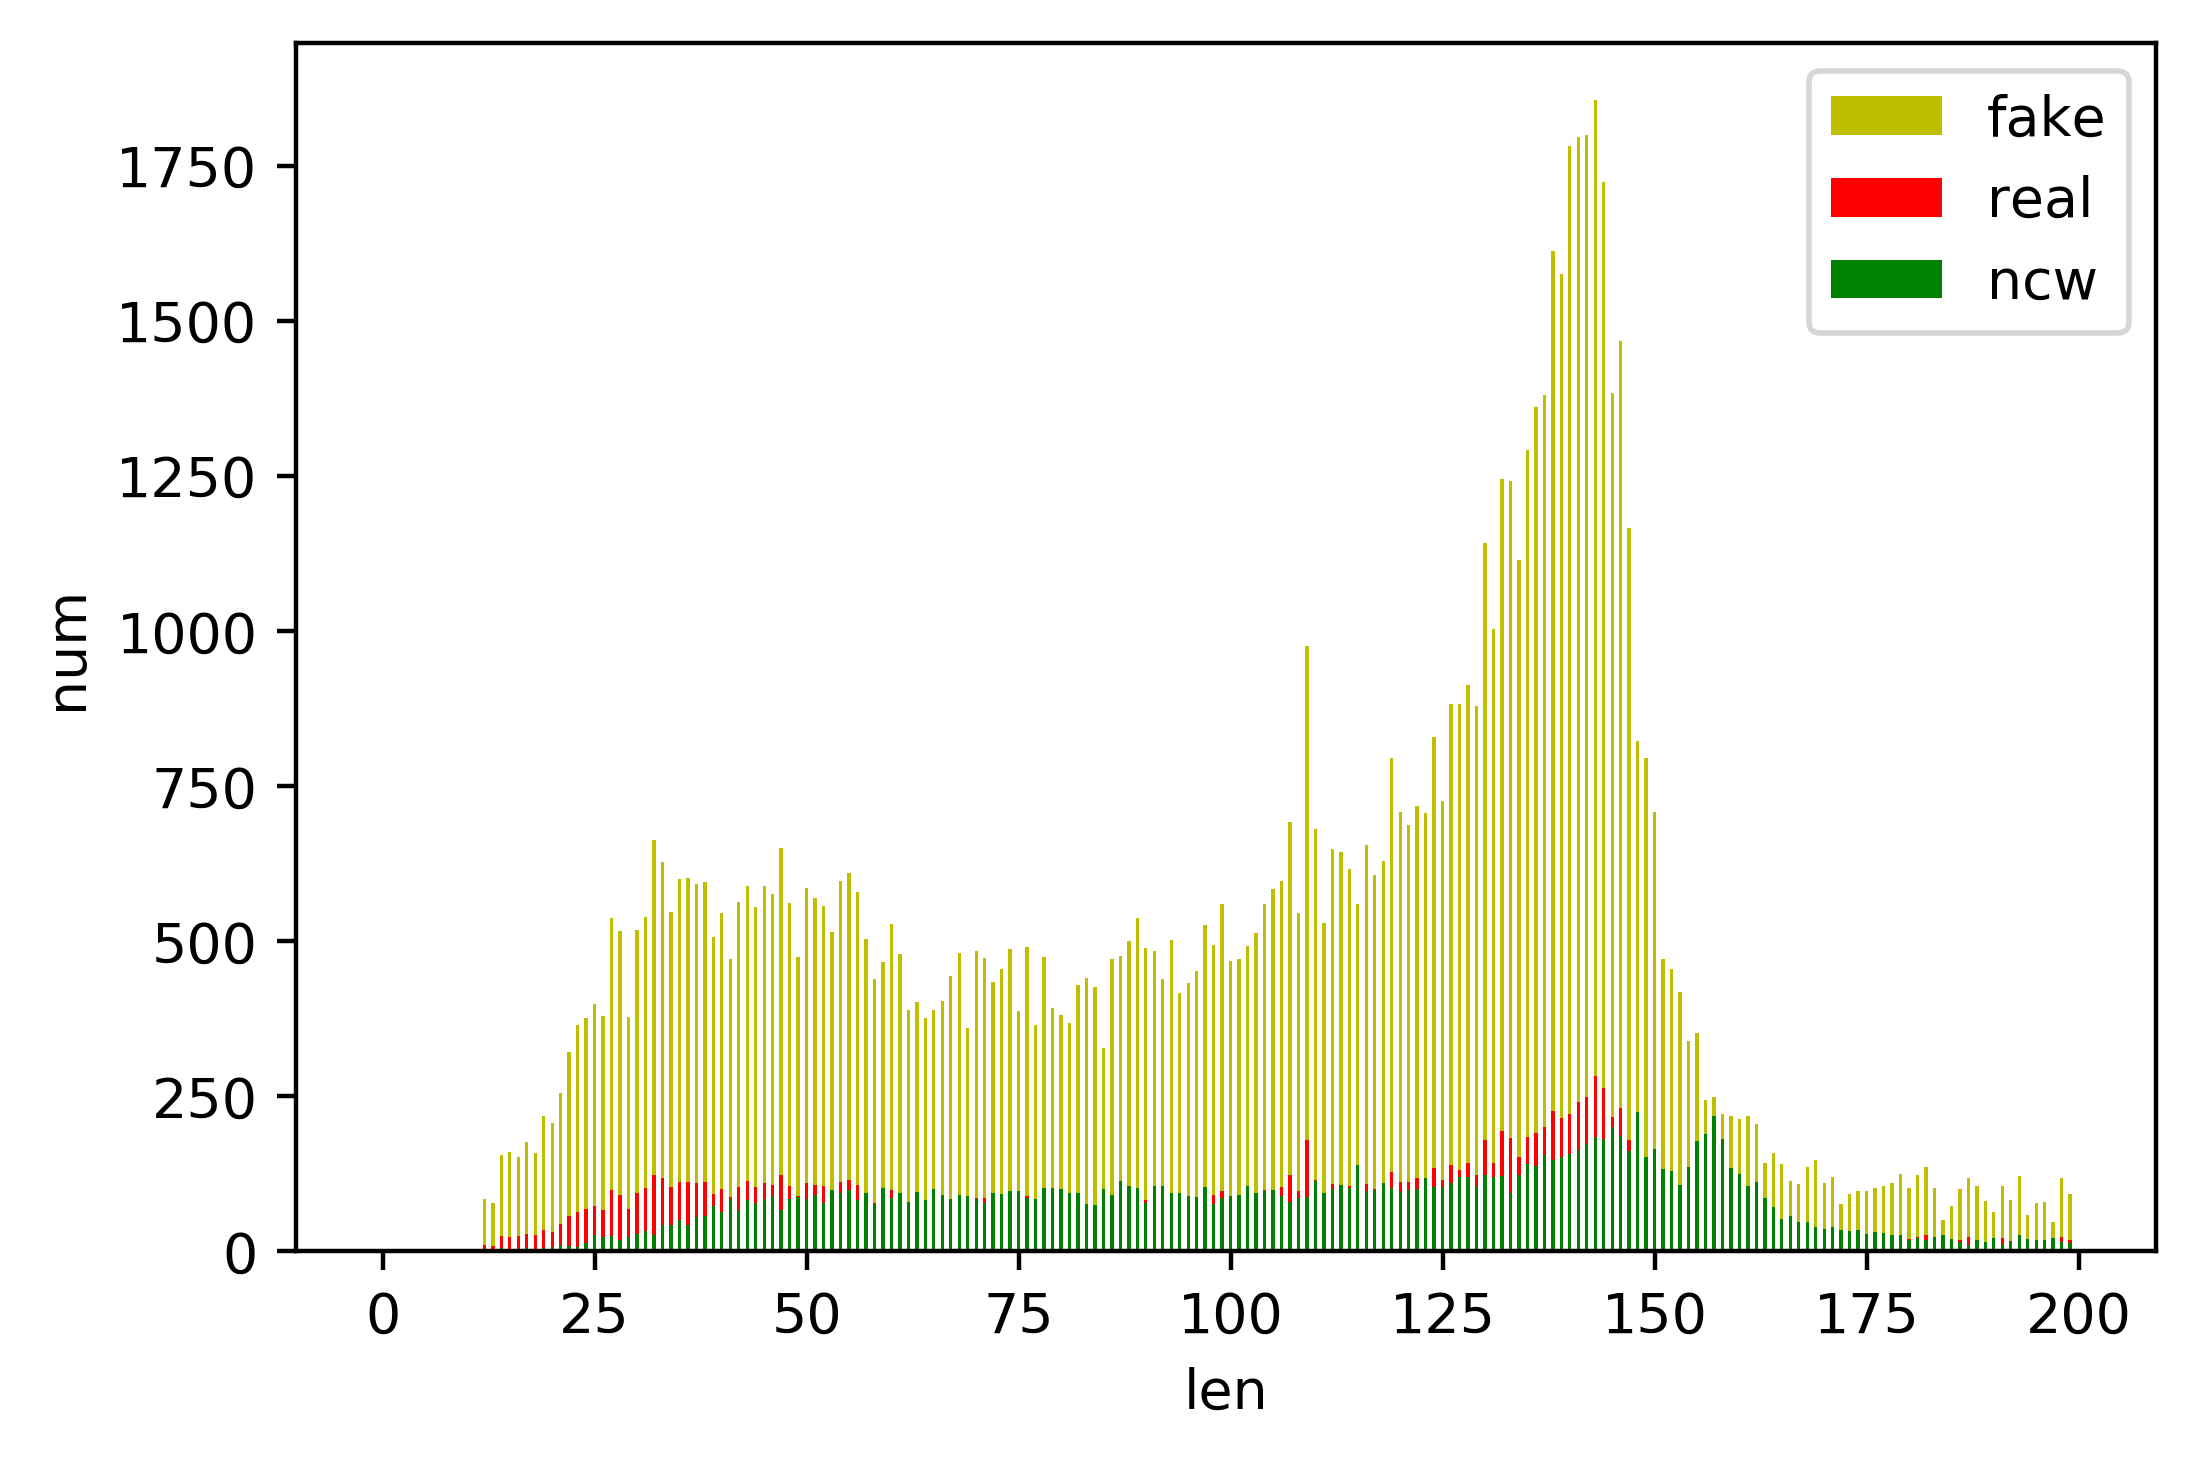

<Figure size 432x288 with 0 Axes>

In [49]:
fig = plt.figure(dpi=400)
plt.bar(all_len, len_1_1, 0.4, label='fake',fc = 'y')
plt.bar(all_len, len_2_1, 0.4, label='real',fc = 'r')
plt.bar(all_len, len_3_1, 0.4, label='ncw',fc = 'g')
plt.xlabel("len")
plt.ylabel("num")
plt.legend()
plt.show()
plt.savefig("len_fb.png")